# CS448 - Lab 0: An Introduction

Below you will find a series of tasks that will help you get started with audio processing using Python. We will start with learning how to generate test sounds, how to read/write audio files, how to perform simple waveform editing and finally how to use real-time audio I/O. Look at the provided hints and try to figure out how to do these tasks on your own. The instructions are intentionally vague so that you practice your problem solving. If you get stuck, talk to me or our TAs for more hints.

Before you submit this lab make sure that you add some text comments describing what is going on.  The questions posed below are not rhetorical, we expect you to actually write something.

Have fun!

## Exercise 1. Generating and playing basic sounds

It is important to be able to generate multiple types of test sounds to test various parts of an audio processing chain. Some of the most important ones are sinusoids, chirps, and certain types of noise. For this exercise you need to generate the following test signals, at a sampling rate of 8kHz and for a duration of a second. Plot them if you like and see if they look right. You will probably have to zoom into the plots to check these waveforms. Also, play these sounds from your computer’s speakers (IMPORTANT: Turn your computer’s volume down, some of these sounds will be loud!)

Useful numpy functions: ```random.randn```, ```sin```, ```linspace```, ```logspace```, ```fromfile```


This function can help you play a sound from a notebook. The ```rate``` parameter is the *sampling rate*, i.e. how many sound samples to play per second (so if you give this function an array of length 8000 and use a rate of 8000, it will play a sound for one second). We will be talking more about this parameter during the next lecture, but for now this should be enough info to get you going.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Audio as sound
import soundfile as sf
import sounddevice as sd

In [2]:
# Make a sound player function that plays array "x" with a sample rate "rate", and labels it with "label"
def sound_player( x, rate=8000, label=''):
    from IPython.display import display, Audio, HTML
    display( HTML( 
    '<style> table, th, td {border: 0px; }</style> <table><tr><td>' + label + 
    '</td><td>' + Audio( x, rate=rate)._repr_html_()[3:] + '</td></tr></table>'
    ))

Let's start by generating white noise. Complete the code below for it.

In [3]:
# Function that returns noise samples
def make_noise( duration=1, sample_rate=8000):
    # YOUR CODE HERE
    num_samples = int(duration * sample_rate)
    x = np.random.randn(num_samples)
    x =  x/np.max(np.abs(x))
    sound_player(x,rate=sample_rate,label='White Noise')
    return x
    
#    raise NotImplementedError()

# Generate it
# YOUR CODE HERE
noise = make_noise(duration=1, sample_rate=8000)
# Play the generated sound
# YOUR CODE HERE

Let's do this one more time, but now generate noise for a sampling rate of 44.1kHz.  How does it sound different?

In [4]:
# Generate with a higher sample rate
# YOUR CODE HERE
new_noise = make_noise(duration=1, sample_rate=44100)

# Play the generated sound
# YOUR CODE HERE

Generate a sinusoid with a frequency of 440 Hz

In [5]:
# Function that returns a sinusoid
def make_sine( frequency=440, duration=1, sample_rate=8000):
    # YOUR CODE HERE
    t = np.linspace(0,duration,int(sample_rate*duration),endpoint=False)
    x = np.sin(2*np.pi*frequency*t)
    x =  x/np.max(np.abs(x))
    sound_player(x,rate=sample_rate,label='sin sound')
    return x

# Generate it
# YOUR CODE HERE

sin_sound = make_sine(frequency=440,duration=1,sample_rate=8000)
# Play the generated sound
# YOUR CODE HERE

Let's do the same but now add two sinusoids, one with 440 Hz and another with 880 Hz. Do it again with frequencies of 440Hz, and 450Hz.  How do these two new sounds differ from before?

In [6]:
# Make the sounds
# YOUR CODE HERE
def make_combined_sine(f1,f2,duration=1,sample_rate=8000):
    t = np.linspace(0,duration,int(sample_rate*duration),endpoint=False)
    x1 = np.sin(2*np.pi*f1*t)
    x2 = np.sin(2*np.pi*f2*t)
    x = x1 + x2
    sound_player(x,rate=sample_rate,label="combined_sine")


# Play the first sound
# YOUR CODE HERE
print("first sound with 440 + 880")
make_combined_sine(440,880,duration=1,sample_rate=8000)
print("second sound with 440 + 450")
make_combined_sine(440,450,duration=1,sample_rate=8000)

# Play the second sound
# YOUR CODE HERE

first sound with 440 + 880


second sound with 440 + 450


Generate a sinusoidal tone with an exponentially decreasing amplitude from 100 to 0.0001

In [7]:
# Function that returns a "ping"
def make_ping( frequency=440, duration=1, sample_rate=8000):
    # YOUR CODE HERE
    t = np.linspace(0,duration,int(sample_rate*duration),endpoint=False)
    tone = np.sin(2*np.pi*frequency*t)
    a_start = 100
    a_end = 0.0001

    envolope = a_start * ( a_end / a_start ) ** ( t / duration )
    x = tone * envolope
    sound_player(x,rate=sample_rate,label="exponentially decreasing sinusoidal tone")# Generate it
# YOUR CODE HERE
make_ping(440,2,8000)
# Play the generated sound

# YOUR CODE HERE

You will now make a stereo file. This is represented as a 2d array, one part containing the left channel and the other containing the right channel. For the left channel generate a quarter-second sinusoidal tone of frequency 523.24Hz with an exponentially decaying amplitude from 100 to 0.0001. For the right channel do the same thing but use a frequency of 784Hz.  Start the right channel tone after a quarter second. Play this and verify that it sounds ok (it should sound like a video game “ping-pong” sound).

In [8]:
# Function that returns a "ping" "pong"
from numpy import full_like, hstack


def make_pingpong( sample_rate=8000):
    t = np.linspace(0,0.25,int(sample_rate*0.25),False)
    left_freq = 523.24
    right_freq = 784
    tone_left = np.sin(2*np.pi*t*left_freq)
    tone_right = np.sin(2*np.pi*t*right_freq)
    envelope = 100 * (0.0001/100)**(t/0.25)
    silence = np.zeros_like(t)
    channel_left = tone_left * envelope
    channel_right = tone_right * envelope
    full_left = np.hstack([channel_left,silence])
    full_right = np.hstack([silence,channel_right])
    x = np.vstack((full_left,full_right))
    return x
    # YOUR CODE HERE

# Generate it
# YOUR CODE HERE
x = make_pingpong()
sound_player(x,rate=8000)

# Play the generated sound
# YOUR CODE HERE

Load the file, ```handel.dat```. It contains a mono-channel sound waveform encoded as a series of 16-bit values. Since it's missing the information that a proper audio file tends to contain (e.g., sample rates), you need to specify the information when you read it using ```soundfile.read()```.  Look at the definition here (https://python-soundfile.readthedocs.io/en/0.13.1/#soundfile.read) and figure out what kind of input parameters are needed to read it. For example, if you use ```format='MP3'```, it won't work because these are raw waveform samples. 

The issue here is that you don't know the sample rate of this signal (because I didn't tell you). You can specify an arbitrary sample rate to make ```soundfile.read()``` run, but it doesn't necessarilly mean that it's the original sample rate. Find out what its sample rate is. There’s no trick here, this one is trial and error: i.e., play the loaded wavefile using different sample rates to figure out the right one. Show some examples where it sounds wrong and explain why.

In [9]:
# YOUR CODE HERE
def show_sound(sample_rate):
    x,_ =sf.read("./handel.dat",dtype='int16',channels=1,samplerate=sample_rate,subtype='PCM_16',format='RAW')
    # raise NotImplementedError()

    # Play them with different sample rates
    sound_player( x, rate=sample_rate, label=f'sound with sample_rate {sample_rate:d}')

sample_rate = [8000,16000,22050,44100,48000,88200,96000]
for rate in sample_rate:
    show_sound(rate)

show_sound(22050) #right one

## Exercise 2. Saving sounds

What good are sounds if we can’t store them? For most of this class we will be using what is known as a PCM format (more on next lecture). The most popular of these formats is the WAVE file, which we will use most often. When saving a sound to a file we need to be careful and make sure we don’t lose any information.

Take the “ping-pong” sound from above and save it to a WAVE file. Play the file back, or open it with an audio editor and find out if there’s anything wrong. If so, find a way to fix it.

Useful python package: ```soundfile.write```

In [10]:
# YOUR CODE HERE
# raise NotImplementedError()
ping_pong_sound = make_pingpong()
if np.max(np.abs(ping_pong_sound)) > 0 :
    ping_pong_sound = ping_pong_sound / np.max(np.abs(ping_pong_sound))
ping_pong_sound = ping_pong_sound.T
sf.write("pingpong.wav",ping_pong_sound,8000)

## Exercise 3. Basic Sound Editing

Here we will learn to do some simple manipulations of sounds. Ordinarily you would do this with an audio editor with a graphical interface, but hey life sucks and you have to do this with code.

Useful python commands:  ```numpy.hstack, matplotlib.pyplot.plot```

Load the file ```1234.wav``` and listen to it. Clearly something is wrong. Try to fix the problem using code.  Explain what you did.


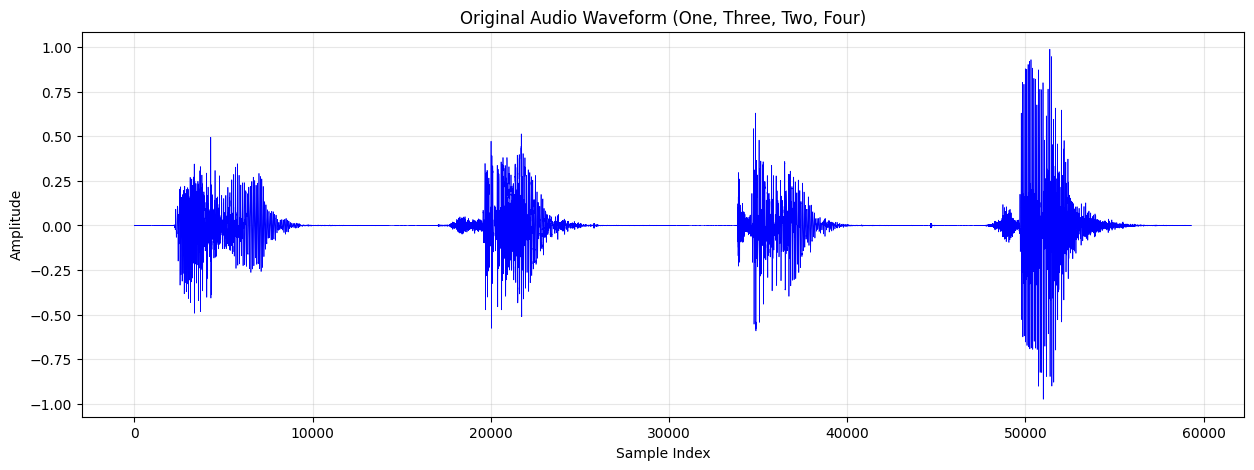

In [11]:

# YOUR CODE HERE
# raise NotImplementedError()
from turtle import color
import matplotlib.pyplot as plt
wav1234, sr = sf.read("1234.wav")

plt.figure(figsize=(15,5))
plt.plot(wav1234,color="blue",linewidth=0.5)
plt.title("Original Audio Waveform (One, Three, Two, Four)")
plt.xlabel("Sample Index")
plt.ylabel("Amplitude")
plt.grid(True,alpha=0.3)
plt.show()

total_samples = len(wav1234)
seg_len = total_samples // 4

segments = []
segments.append(wav1234[0:12000])
segments.append(wav1234[12000:30000])
segments.append(wav1234[30000:43000])
segments.append(wav1234[43000:total_samples])
sound_player(wav1234,sr,"before")
wav1234 = np.hstack([segments[0],segments[2],segments[1],segments[3]])
sound_player(wav1234,sr,"after")



Use the above file to create a countdown instead.



In [12]:
# YOUR CODE HERE
# raise NotImplementedError()
wav4321 = np.hstack([segments[3],segments[1],segments[2],segments[0]])
sound_player(wav4321,sr,"countdown")



Load the file ```handel.wav``` There’s something wrong here too. Fix it!  Explain what you did.

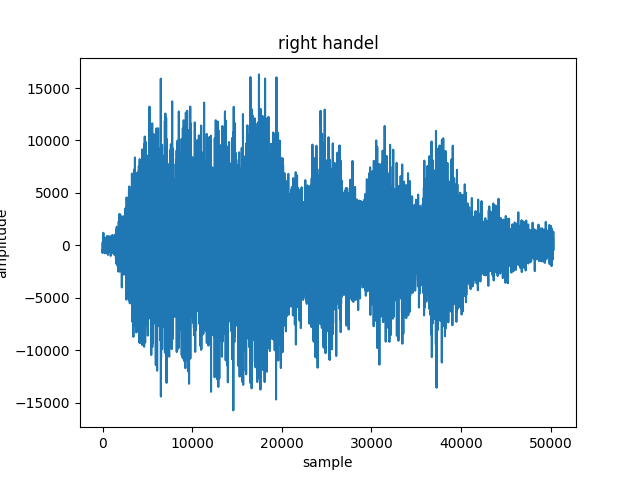

len of right_handel 50313
len of broken handel 44100


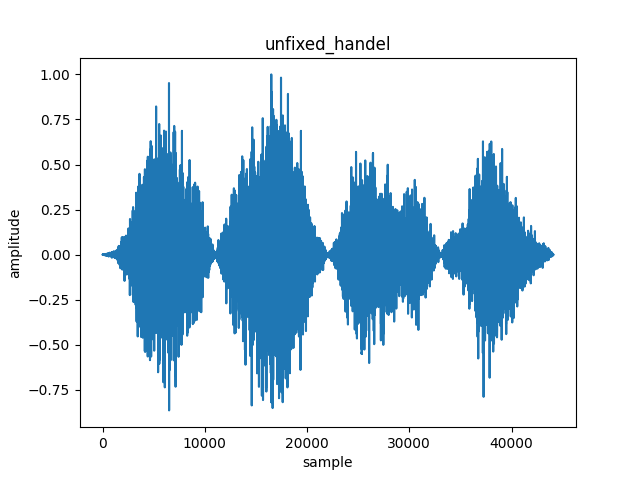

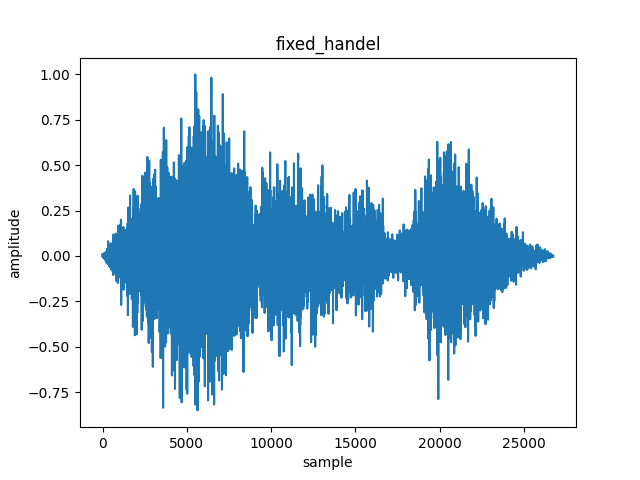

In [13]:
# YOUR CODE HERE
%matplotlib widget
import matplotlib.pyplot as plt
# YOUR CODE HERE
right_handel,_ =sf.read("./handel.dat",dtype='int16',channels=1,samplerate=22050,subtype='PCM_16',format='RAW')

sound_player(right_handel,22050,"right_handel")
plt.figure()
plt.plot(right_handel)
plt.title("right handel")
plt.xlabel("sample")
plt.ylabel("amplitude")
plt.show()


# raise NotImplementedError()

handel,sr = sf.read("handel.wav")
print("len of right_handel",len(right_handel))
print("len of broken handel",len(handel))
plt.figure()
plt.plot(handel)
plt.title("unfixed_handel")
plt.xlabel("sample")
plt.ylabel("amplitude")
plt.show()
sound_player(handel,sr,"unfixed_handel")


v1,v2 = 11000, 22000
p1 = handel[0:11000]
p2 = handel[11000:20150]

p3 = handel[24000:31500]
p4 = handel[34000:len(handel)]
fixed_handel = hstack([p2,p3,p4])
plt.figure()
plt.plot(fixed_handel)
plt.title("fixed_handel")
plt.xlabel("sample")
plt.ylabel("amplitude")
plt.show()

sound_player(fixed_handel,sr,"fixed_handel")


Load the two files ```m1.wav``` and ```m2.wav```. They are roughly at the same tempo and you want to make a music mix out of them. Play the first sound for two seconds, then fade it out over four seconds. While the first sound fades out the second one should fade in at the same speed. Congrats, you just learned how to (poorly) DJ in python!

In [14]:
# YOUR CODE HERE
# raise NotImplementedError()
m1wav,sr1 = sf.read("m1.wav")
m2wav,sr2 = sf.read("m2.wav")
sound_player(m1wav,sr1)
sound_player(m2wav,sr2)
#process m1
m1_start = m1wav[0:2*sr1]
m1_fade_out_part = m1wav[2*sr1:6*sr1]
fade_out_weights = np.linspace(1,0,len(m1_fade_out_part),endpoint=True)
len(m1wav.shape)
m1_faded = m1_fade_out_part * fade_out_weights

#process m2
m2_fade_in_part = m2wav[0:4*sr2]
fade_in_weights = np.linspace(0,1,len(m2_fade_in_part),endpoint=True)
m2_faded = m2_fade_in_part * fade_in_weights
#mix
mixed_wav = m1_faded + m2_faded
final_mix = np.hstack([m1_start,mixed_wav])
sound_player(final_mix,sr1,"final_mix")

## Exercise 4. Real-time processing

In real-life you can’t just load an existing soundfile, process at your leisure and save it. You have to be able to process sound in real-time. This means that you will record tiny snippets of sound, quickly process each one and then move to the rest without looking back again. In this exercise we will try a couple of real-time things to get the hang of it. Interpreted languages is generally horrible for real-time systems, but we’ll stick with them since it’s much simpler than writing low-level code. In python you can use the package ```sounddevice``` to get some low-level audio control. Open an audio stream with a sample rate of 16kHz and a single channel. Use a buffer size of 1024 samples.

You will then create a loop in which we get a snippet of sound from the microphone at each pass. Inside the loop you will read from the stream (which should be taking samples off the microphone). Using this, measure the standard deviation of each incoming sound snippet of sound and after eight seconds of recording plot these as a sequence.

Useful python commands:  ```sounddevice.InputStream```

*Note: You cannot run this part on a remote server, if you do so it will try to open the audio i/o of the remote machine.  You need to run this one on your local machine.*

In [15]:
# List up what kind of devices are available
devices = sd.query_devices()
for i, device in enumerate(devices):
    print(f"Device ID: {i}")
    print(f"  Name: {device['name']}")
    print(f"  Input Channels: {device['max_input_channels']}")
    print(f"  Output Channels: {device['max_output_channels']}")
    print("-" * 20)

Device ID: 0
  Name: Microsoft 声音映射器 - Input
  Input Channels: 2
  Output Channels: 0
--------------------
Device ID: 1
  Name: 麦克风 (Senary Audio)
  Input Channels: 2
  Output Channels: 0
--------------------
Device ID: 2
  Name: 麦克风阵列 (Senary Audio)
  Input Channels: 2
  Output Channels: 0
--------------------
Device ID: 3
  Name: Microsoft 声音映射器 - Output
  Input Channels: 0
  Output Channels: 2
--------------------
Device ID: 4
  Name: 耳机 (Senary Audio)
  Input Channels: 0
  Output Channels: 6
--------------------
Device ID: 5
  Name: 扬声器 (Senary Audio)
  Input Channels: 0
  Output Channels: 6
--------------------
Device ID: 6
  Name: 主声音捕获驱动程序
  Input Channels: 2
  Output Channels: 0
--------------------
Device ID: 7
  Name: 麦克风 (Senary Audio)
  Input Channels: 2
  Output Channels: 0
--------------------
Device ID: 8
  Name: 麦克风阵列 (Senary Audio)
  Input Channels: 2
  Output Channels: 0
--------------------
Device ID: 9
  Name: 主声音驱动程序
  Input Channels: 0
  Output Channels: 2
-------

In [16]:
# YOUR CODE HERE
from tarfile import BLOCKSIZE


sample_rate = 16000
BlOCKSIZE = 1024
duration = 8
stds = np.array([])
num_blocks = (duration * sample_rate) // BLOCKSIZE
with sd.InputStream(samplerate=sample_rate,channels=1,blocksize=BLOCKSIZE,device=1) as stream:
    for _ in range(num_blocks):
        data_block,_ = stream.read(BLOCKSIZE)
        stds = np.append(stds,np.std(data_block))
# raise NotImplementedError()
plt.figure(figsize=(10,4))
plt.plot(stds)
plt.show()

KeyboardInterrupt: 

Now let’s try to add some output as well. We will make a robot voice effect that makes use of a ring modulator. This is the same effect that’s been used to generate robot voices for many films and TV shows (e.g. the Daleks in Dr. Who, Droids in Star Wars, etc.).

We will reuse the loop that we made above, but this time we will additionally have an audio output. Do the same as above, but this time you can also write to the stream to send a buffer of samples to the speaker. For a test you can simply pass the input buffer from read to write, and this would simply play from the speakers the sounds you make to the microphone.

Pro tips:
- IMPORTANT: Wear headphones to avoid a feedback loop!
- Every time you put on headphones (in general) set the volume to a very low value to avoid any painful surprises. 

Once you verify that a passthrough works, multiply each input snippet with a a 440Hz sine and send that to the output to create a voice transformation. If successful, it should sound robotic. Congrats, you just made your first real-time audio effect!  Try changing the sinusoid frequency to get varying effects.  Comment on what you hear.

Useful python commands:  ```sounddevice.Stream```

In [ ]:
sample_rate = 16000
BLOCKSIZE = 1024
duration = 8
block_num = (duration * sample_rate) // BLOCKSIZE
with sd.Stream(samplerate=sample_rate,channels=1,blocksize=BLOCKSIZE,device=None,) as stream:
    for _ in range(block_num):
        indata,_ = stream.read(BLOCKSIZE)
        stream.write(indata.astype(np.float32))

KeyboardInterrupt: 

In [ ]:

# # YOUR CODE HERE
# raise NotImplementedError()
sample_rate = 16000
BLOCKSIZE = 1024
duration = 8 
current_phi = 0.0
MODE_FREQ = 440.0
delta_phi = 2 * np.pi * MODE_FREQ / sample_rate
block_num = (duration * sample_rate) // BLOCKSIZE
with sd.Stream(samplerate=sample_rate,channels=1,blocksize=BLOCKSIZE,device=None,) as stream:
    for _ in range(block_num):
        indata,_ = stream.read(BLOCKSIZE)

        t = np.arange(BLOCKSIZE).reshape(-1,1)
        block_phases = current_phi + t * delta_phi
        outdata = indata * np.sin(block_phases)
        current_phi += BLOCKSIZE * delta_phi
        current_phi %= 2*np.pi
        stream.write(outdata.astype(np.float32))

Optional: If you have an audio interface you can use the code above as an effects box.  E.g., if you are an electric guitar player, try transforming the audio signal with `ouput = tanh( a * input)` and depending on the value of the scalar `a` it will produce a proportional distortion effect.  As we learn about more types of processing throughout the semester you can experiment with plugging them in this real-time loop.